# KMeans Clustering on Melbourne Housing Data (Preprocessed)

Objective: Cluster properties based on 'Price' and 'Rooms' to identify natural market segments, with feature scaling applied to give both features comparable influence.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

%matplotlib inline
sns.set_style('whitegrid')

## 1. Load Data

In [ ]:
# Load the dataset
try:
    df = pd.read_csv('../csv/midterm_dataset/melb_data.csv')
except FileNotFoundError:
    print("Error: 'Melbourne_housing_FULL.csv' not found. Please check the file path.")
    df = pd.DataFrame() # Create an empty DataFrame to avoid further errors

if not df.empty:
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Info:")
    print(df.info())

First 5 rows of the dataset:
       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude    

## 2. Select Features and Handle Missing Values

We will use 'Price' and 'Rooms' for clustering.

In [7]:
if not df.empty:
    features_orig = df[['Price', 'Rooms']].copy()
    
    initial_rows = len(features_orig)
    features_orig.dropna(inplace=True)
    final_rows = len(features_orig)
    
    print(f"Initial number of rows: {initial_rows}")
    print(f"Number of rows after dropping NaNs: {final_rows}")
    print(f"Number of rows dropped: {initial_rows - final_rows}")
    print("\nOriginal features head (after NaN drop):")
    print(features_orig.head())

Initial number of rows: 13580
Number of rows after dropping NaNs: 13580
Number of rows dropped: 0

Original features head (after NaN drop):
       Price  Rooms
0  1480000.0      2
1  1035000.0      2
2  1465000.0      3
3   850000.0      3
4  1600000.0      4


## 3. Preprocess Data (Scaling)

KMeans is sensitive to feature scales. We'll scale 'Price' and 'Rooms' using StandardScaler to give them zero mean and unit variance.

In [8]:
if not features_orig.empty:
    scaler = StandardScaler()
    features_scaled_array = scaler.fit_transform(features_orig[['Price', 'Rooms']])
    # Create a new DataFrame for scaled features, preserving the index from features_orig
    features_scaled = pd.DataFrame(features_scaled_array, columns=['Price_Scaled', 'Rooms_Scaled'], index=features_orig.index)
    
    print("Scaled features head:")
    print(features_scaled.head())
    print("\nDescription of scaled features:")
    print(features_scaled.describe())

Scaled features head:
   Price_Scaled  Rooms_Scaled
0      0.632448     -0.981463
1     -0.063640     -0.981463
2      0.608984      0.064876
3     -0.353025      0.064876
4      0.820157      1.111216

Description of scaled features:
       Price_Scaled  Rooms_Scaled
count  1.358000e+04  1.358000e+04
mean   1.444107e-16 -2.595208e-16
std    1.000037e+00  1.000037e+00
min   -1.549670e+00 -2.027803e+00
25%   -6.658730e-01 -9.814634e-01
50%   -2.701197e-01  6.487613e-02
75%    3.978117e-01  6.487613e-02
max    1.239555e+01  7.389253e+00


## 4. Determine Optimal Number of Clusters (Elbow Method on Scaled Data)

d:\Projects\machine-learning\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Projects\machine-learning\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ajapa\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ajapa\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ajapa\AppData\Local\Program

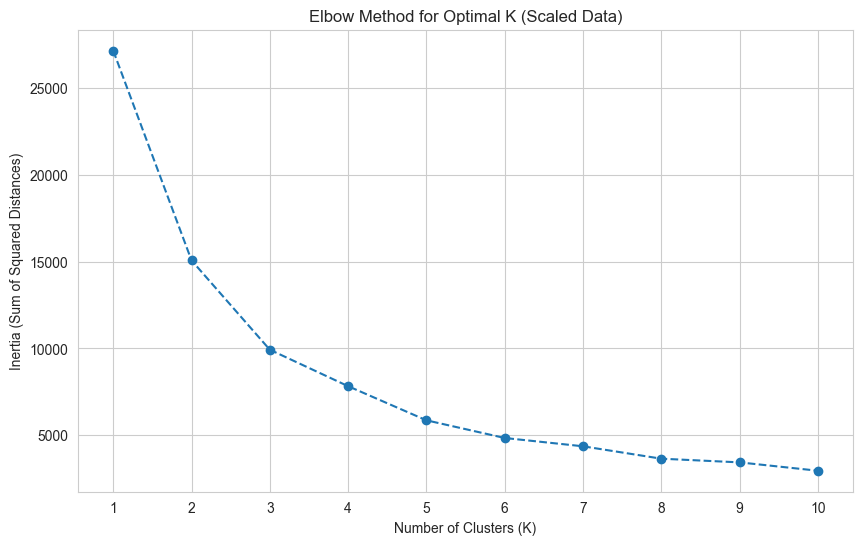

In [9]:
if not features_scaled.empty and len(features_scaled) > 10:
    inertia_scaled = []
    k_range = range(1, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(features_scaled[['Price_Scaled', 'Rooms_Scaled']])
        inertia_scaled.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia_scaled, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.title('Elbow Method for Optimal K (Scaled Data)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()
else:
    print("Not enough data points to perform Elbow method after cleaning/scaling.")

Based on the elbow plot for scaled data, choose an appropriate K. The elbow might be clearer with scaled data. Let's assume K=3 or K=4. We'll proceed with K=3 for this example.

## 5. Apply KMeans Clustering on Scaled Data

In [10]:
if not features_scaled.empty and len(features_scaled) > 10:
    optimal_k_scaled = 3 # Choose based on the elbow plot for scaled data
    kmeans_scaled = KMeans(n_clusters=optimal_k_scaled, random_state=42, n_init='auto')
    
    # Fit on scaled data and get labels
    cluster_labels_scaled = kmeans_scaled.fit_predict(features_scaled[['Price_Scaled', 'Rooms_Scaled']])
    
    # Add cluster labels to both scaled and original (unscaled but cleaned) dataframes
    features_scaled['Cluster_Scaled'] = cluster_labels_scaled
    features_orig['Cluster_Scaled'] = cluster_labels_scaled # Assigns based on shared index
    
    print(f"Cluster centers (Scaled Data) for K={optimal_k_scaled}:")
    centroid_scaled_df = pd.DataFrame(kmeans_scaled.cluster_centers_, columns=['Price_Scaled_Centroid', 'Rooms_Scaled_Centroid'])
    print(centroid_scaled_df)
    
    print("\nScaled features head with cluster labels:")
    print(features_scaled.head())
    print("\nOriginal features head with cluster labels (from scaled clustering):")
    print(features_orig.head())

Cluster centers (Scaled Data) for K=3:
   Price_Scaled_Centroid  Rooms_Scaled_Centroid
0              -0.572829              -1.147059
1              -0.151719               0.364179
2               1.796156               1.147532

Scaled features head with cluster labels:
   Price_Scaled  Rooms_Scaled  Cluster_Scaled
0      0.632448     -0.981463               0
1     -0.063640     -0.981463               0
2      0.608984      0.064876               1
3     -0.353025      0.064876               1
4      0.820157      1.111216               2

Original features head with cluster labels (from scaled clustering):
       Price  Rooms  Cluster_Scaled
0  1480000.0      2               0
1  1035000.0      2               0
2  1465000.0      3               1
3   850000.0      3               1
4  1600000.0      4               2


## 6. Visualize Clusters

### 6.1. Visualize Clusters on Scaled Data
This shows how KMeans partitioned the data in the transformed feature space.

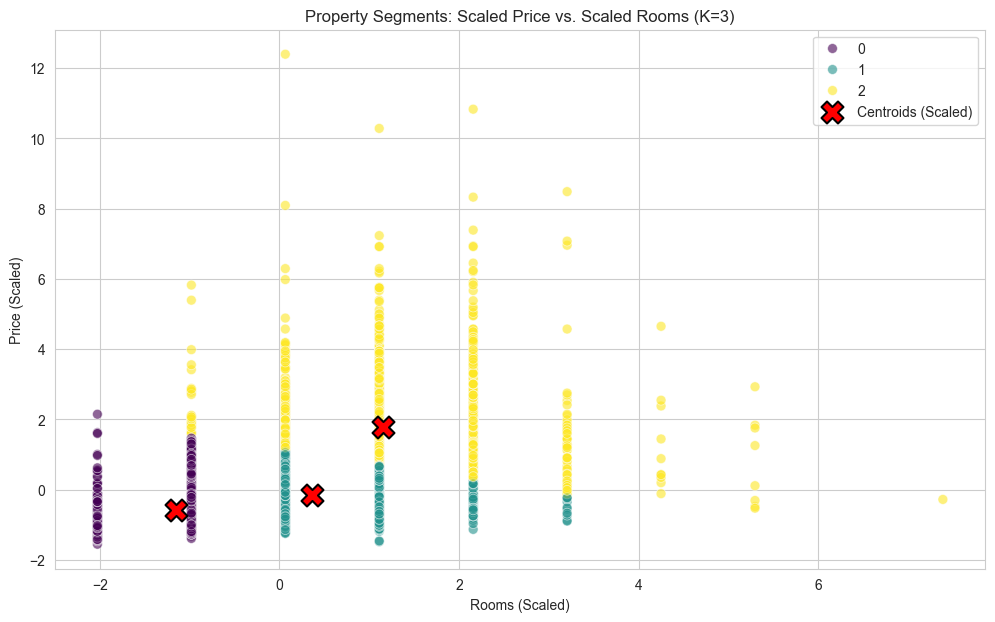

In [11]:
if not features_scaled.empty and 'Cluster_Scaled' in features_scaled.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=features_scaled, x='Rooms_Scaled', y='Price_Scaled', hue='Cluster_Scaled', palette='viridis', s=50, alpha=0.6)
    
    centroids_scaled = kmeans_scaled.cluster_centers_
    # Scaled centroids: centroids_scaled[:, 0] is Price_Scaled, centroids_scaled[:, 1] is Rooms_Scaled
    # Scatter plot: x='Rooms_Scaled', y='Price_Scaled'
    plt.scatter(centroids_scaled[:, 1], centroids_scaled[:, 0], marker='X', s=250, color='red', label='Centroids (Scaled)', edgecolors='black', linewidth=1.5)
    
    plt.title(f'Property Segments: Scaled Price vs. Scaled Rooms (K={optimal_k_scaled})')
    plt.xlabel('Rooms (Scaled)')
    plt.ylabel('Price (Scaled)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Clustering was not performed or 'Cluster_Scaled' column is missing from scaled features.")

### 6.2. Visualize Clusters on Original Data Scale
To interpret the clusters in their original units, we plot the original data colored by the new cluster labels and transform centroids back to original scale.

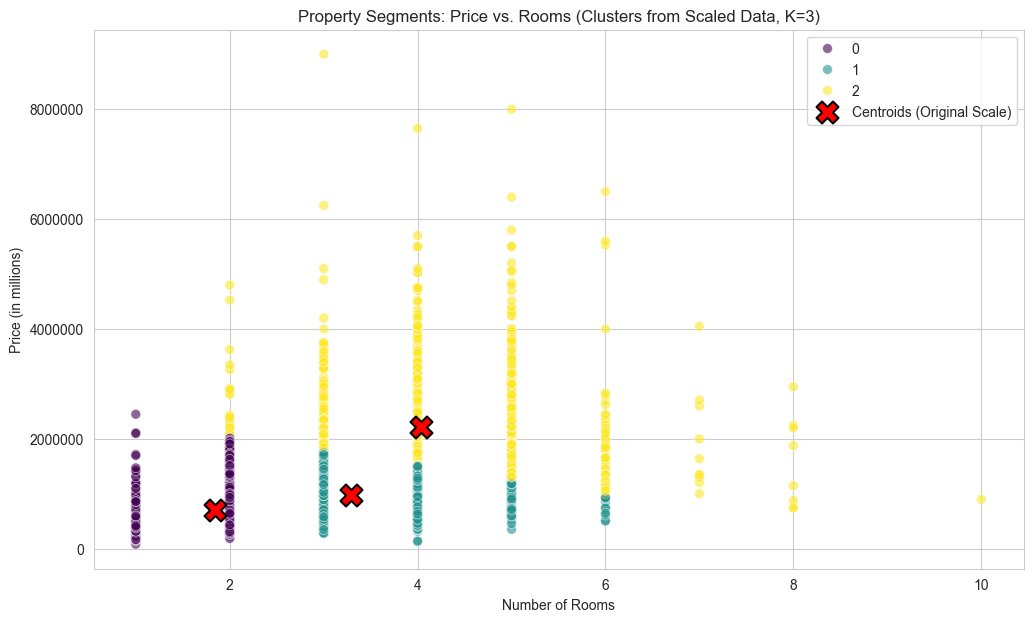


Cluster centers (Original Scale, from scaled data clustering):
   Price_Centroid  Rooms_Centroid
0    7.094821e+05        1.841738
1    9.786924e+05        3.286047
2    2.223943e+06        4.034708


In [12]:
if not features_orig.empty and 'Cluster_Scaled' in features_orig.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=features_orig, x='Rooms', y='Price', hue='Cluster_Scaled', palette='viridis', s=50, alpha=0.6)
    
    # Inverse transform centroids to original scale
    centroids_orig_scale = scaler.inverse_transform(kmeans_scaled.cluster_centers_)
    # Centroids_orig_scale: [Price, Rooms]
    # Scatter plot: x='Rooms', y='Price'
    plt.scatter(centroids_orig_scale[:, 1], centroids_orig_scale[:, 0], marker='X', s=250, color='red', label='Centroids (Original Scale)', edgecolors='black', linewidth=1.5)
    
    plt.title(f'Property Segments: Price vs. Rooms (Clusters from Scaled Data, K={optimal_k_scaled})')
    plt.xlabel('Number of Rooms')
    plt.ylabel('Price (in millions)')
    plt.ticklabel_format(style='plain', axis='y')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("\nCluster centers (Original Scale, from scaled data clustering):")
    centroid_df_orig = pd.DataFrame(centroids_orig_scale, columns=['Price_Centroid', 'Rooms_Centroid'])
    print(centroid_df_orig)
else:
    print("Clustering was not performed or 'Cluster_Scaled' column is missing from original features.")